In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install cython
!{sys.executable} -m pip install POT

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

In [3]:
# Source Distribution
no_samples_source = 50
mean_source = np.array([0, 0])
covariance_source = np.array([[1, 0], [0, 1]])
x_source = ot.datasets.make_2D_samples_gauss(no_samples_source, mean_source, covariance_source)
weights_source = np.ones((no_samples_source,)) / no_samples_source

In [5]:
# Target Distribution
no_samples_target = 50
mean_target = np.array([4, 4])
covariance_target = np.array([[1, -0.8], [-0.8, 1]])
x_target = ot.datasets.make_2D_samples_gauss(no_samples_target, mean_target, covariance_target)
weights_target = np.ones((no_samples_target,)) / no_samples_target

In [6]:
# Loss Matrix with squared euclidean distance as the cost
loss_matrix = ot.dist(x_source, x_target)
# Normalize Loss Matrix with maximum
loss_matrix = loss_matrix / loss_matrix.max()

Text(0.5, 1.0, 'Cost matrix M')

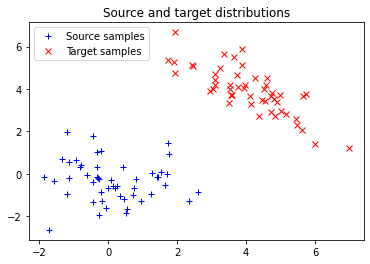

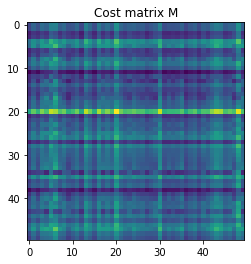

In [10]:
pl.figure(1)
pl.plot(x_source[:, 0], x_source[:, 1], '+b', label='Source samples')
pl.plot(x_target[:, 0], x_target[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(loss_matrix, interpolation='nearest')
pl.title('Cost matrix M')

The cost is: 0.3288333430587579


Text(0.5, 1.0, 'OT matrix with samples')

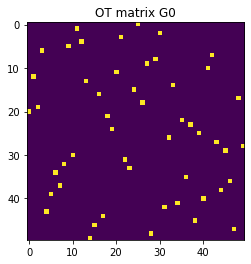

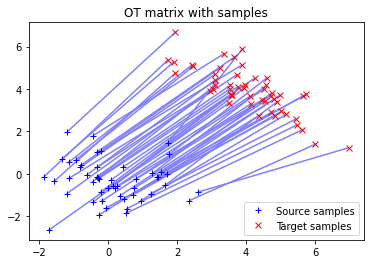

In [12]:
transport_map = ot.emd(weights_source, weights_target, loss_matrix, log = True)
print("The cost is: {}".format(transport_map[1]['cost']))
pl.figure(3)
pl.imshow(transport_map[0], interpolation='nearest')
pl.title('OT matrix G0')

pl.figure(4)
ot.plot.plot2D_samples_mat(x_source, x_target, transport_map[0], c=[.5, .5, 1])
pl.plot(x_source[:, 0], x_source[:, 1], '+b', label='Source samples')
pl.plot(x_target[:, 0], x_target[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')